In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as dates
import config

plt.rcParams.update({'font.size': 22})


/tmp/ipykernel_71259/2235328462.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

def import_catalog(file):
    df = pd.read_csv(file)
    df.sort_values(by='first_arrival', inplace=True)
    df['arrival_datetime'] = df.arrival_time.apply(dates.num2date)
    return df

def plot_depths(df, cmap, day):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.scatter(df.arrival_datetime, df.depth, marker='.', linewidth=0, c=df.first_hydrophone, cmap=cmap)
    ax.set_ylabel('day '+str(day))
    ax.set_ylim(400, 50)
    return fig, ax

In [3]:
df141 = import_catalog(file='141precision.csv')
df188 = import_catalog(file='188precision.csv')
df197 = import_catalog(file='197precision.csv')
df211 = import_catalog(file='211precision.csv')


In [4]:
# also need to remove a number of columns that are simply irrelevant to the analysis or untested for a shareable dataset.

columns_to_keep = ['id', 'depth', 'relative_depth',
        'first_hydrophone', 'second_hydrophone',
       'arrival_time', 'first_arrival', 'second_arrival', 'dt',
       'max_amp', 'cum_amp', 'arrival_datetime', 'origin_time']

df141 = df141[columns_to_keep].copy()
df188 = df188[columns_to_keep].copy()
df197 = df197[columns_to_keep].copy()
df211 = df211[columns_to_keep].copy()

df141.sort_values(by='arrival_datetime', inplace=True)
df188.sort_values(by='arrival_datetime', inplace=True)
df197.sort_values(by='arrival_datetime', inplace=True)
df211.sort_values(by='arrival_datetime', inplace=True)

# # removing the events with maximum amplitude <0.1 since they are false positives
df141 = df141[df141.max_amp > 0.5].copy()
df188 = df188[df188.max_amp > 0.5].copy()
df197 = df197[df197.max_amp > 0.5].copy()
df211 = df211[df211.max_amp > 0.5].copy()

df141.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df188.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df197.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df211.drop_duplicates(subset=['arrival_datetime',], inplace=True)

df141 = df141[df141.depth > 160].copy()
df188 = df188[df188.depth > 160].copy()
df197 = df197[df197.depth > 160].copy()
df211 = df211[df211.depth > 160].copy()

amplitude: 273.18656548251727
3535.391999999993
amplitude: 56.95750129387181
4477.459000000003
amplitude: 71.58338982931284
6094.117998999999
amplitude: 557.2534597217959
1570.7299999999998


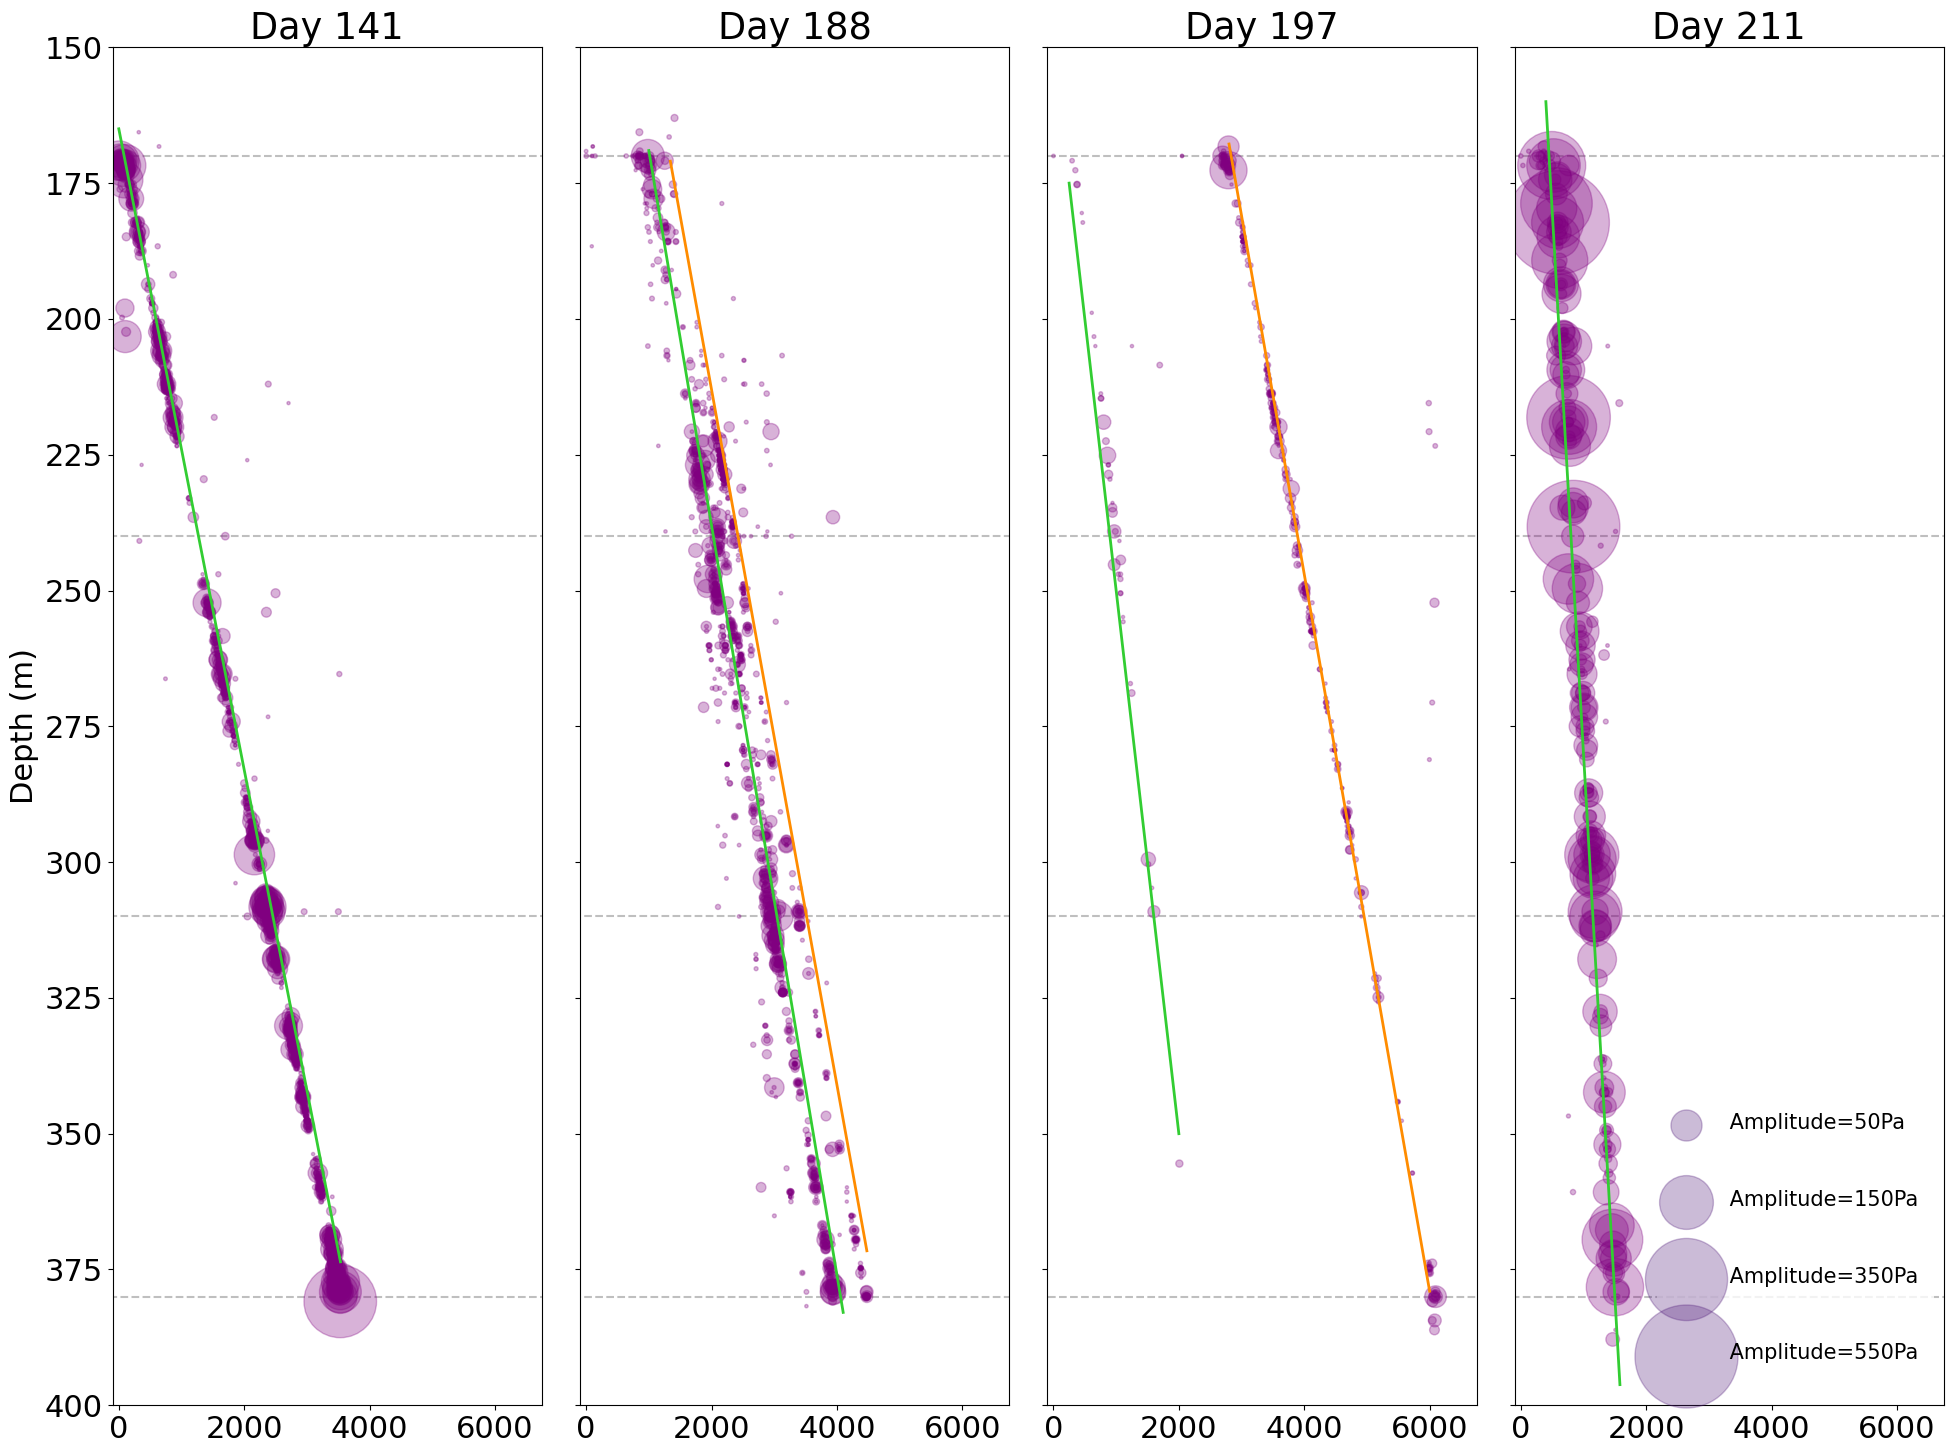

In [68]:
fig, ax = plt.subplots(1, 4, figsize=(20, 15), sharey=True, sharex=True)

ax[3].scatter([0], [0], s=[50*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=50Pa \n')
ax[3].scatter([0], [0], s=[150*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=150Pa \n')
ax[3].scatter([0], [0], s=[350*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=350Pa \n')
ax[3].scatter([0], [0], s=[550*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=550Pa \n')
ax[3].legend(edgecolor='None', loc='lower right', fontsize=15)

def plot_events(data, ax):
    x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values
    y = data['depth'].values
    s = data['max_amp'].values
    print('amplitude:',s.max())
    print(x.max())
    # ax.scatter(x/x.max(), y, s=s*10, alpha=0.3, c=plt.cm.twilight(0.4))
    # ax.scatter(x, y, s=s*10, alpha=0.3, c=plt.cm.twilight(0.4))
    ax.scatter(x, y, s=s*10, alpha=0.3, c='purple')
    return x.max()

def plot_best_fit_line(slope, intercept, ax, xstart=0, xend=1, **kwargs):
    x = np.linspace(xstart, xend, 1000)
    y = slope * x + intercept
    # ax.plot(x, y, color='limegreen', linewidth=2, **kwargs)
    ax.plot(x, y, linewidth=2, **kwargs)

def plot_hydrophone_depth_horizontal_line(hid, ax):
    hids = ['h1', 'h2', 'h3', 'h4', 'h5', 'h6']
    for hid in hids:
        depth = config.hydrophone_metadata_141[hid]['depth']
        ax.hlines(y=depth, xmin=-70000, xmax=700000, linestyle='--', color='black', alpha=0.25, zorder=0)

plot_hydrophone_depth_horizontal_line(hid='h3', ax=ax[0])
plot_hydrophone_depth_horizontal_line(hid='h4', ax=ax[1])
plot_hydrophone_depth_horizontal_line(hid='h5', ax=ax[2])
plot_hydrophone_depth_horizontal_line(hid='h6', ax=ax[3])
    
x141 = plot_events(data=df141, ax=ax[0])
x188 = plot_events(data=df188, ax=ax[1])
x197 = plot_events(data=df197, ax=ax[2])
x211 = plot_events(data=df211, ax=ax[3])

plot_best_fit_line(slope=0.059, intercept=165
                   , ax=ax[0], xstart=0, xend=x141
                  , label=r'$y = 0.059 x + 165$'
                  , color='limegreen')

# plot_best_fit_line(slope=0.071, intercept=115
#                    , ax=ax[1], xstart=0.2*x188, xend=0.8*x188
#                   , label=r'$y = 0.071 x + 115$')

plot_best_fit_line(slope=0.069, intercept=100
                   , ax=ax[1], xstart=1000, xend=4100
                  ,linestyle='-', label=r'$y = 0.069x + 100$'
                  ,color='limegreen')

plot_best_fit_line(slope=0.064, intercept=85
                   , ax=ax[1], xstart=0.3*x188, xend=1*x188
                  ,linestyle='-', label=r'$y = 0.064x + 85$'
                  ,color='darkorange')

plot_best_fit_line(slope=0.1, intercept=150
                   , ax=ax[2], xstart=250, xend=2000
                  ,label=r'$0.1 x + 150$'
                  ,color='limegreen')

plot_best_fit_line(slope=0.066, intercept=-17
                   , ax=ax[2], xstart=2800, xend=6000
                  ,linestyle='-', label=r'$y = 0.066 x - 17$'
                  ,color='darkorange')

plot_best_fit_line(slope=0.2, intercept=80
                   , ax=ax[3], xstart=400, xend=1581
                  ,label=r'$y = 0.2 x + 85$'
                  ,color='limegreen')

ax[0].set_yticks(np.arange(150, 425, 25))
ax[0].set_yticklabels(np.arange(150, 425, 25))
ax[0].set_ylim(400, 150)
ax[0].set_xlim(-100, 6750)
# fig.tight_layout()
ax[0].set_title('Day 141')
ax[1].set_title('Day 188')
ax[2].set_title('Day 197')
ax[3].set_title('Day 211')

ax[0].set_ylabel('Depth (m)')
fig.tight_layout()
fig.savefig('fig4.pdf', bbox_inches='tight')

In [69]:
df = pd.read_excel('Dataset_BA1A.xlsx')

geology_columns = ['Re-logged in Southampton, October 2020_Dunite',
       'Re-logged in Southampton, October 2020_Dunite with Harzburgite',
       'Re-logged in Southampton, October 2020_Dunite with serpentine',
       'Re-logged in Southampton, October 2020_Dunite with some Harzburgite',
       'Re-logged in Southampton, October 2020_Dunite with some serpentine',
       'Re-logged in Southampton, October 2020_Gabbro with harzburgite',
       'Re-logged in Southampton, October 2020_Harzburgite',
       'Re-logged in Southampton, October 2020_Harzburgite with gabbro',
       'Re-logged in Southampton, October 2020_Harzburgite with some dunite and gabbro',
       'Re-logged in Southampton, October 2020_Harzburgite with some gabbro',
       'Re-logged in Southampton, October 2020_Harzburgite with some serpentine',
       'Re-logged in Southampton, October 2020_Harzburgite with some serpentine and gabbro',
       'TOP_DEPTH']
geo_df = df[geology_columns].copy()

plot_data = geo_df.set_index('TOP_DEPTH').transpose()
for n, idx in enumerate(plot_data.index):
    plot_data.loc[idx] = plot_data.loc[idx] * (n + 1)
plot_data.loc['combined'] = plot_data.sum()
plot_data = plot_data.transpose()
plot_data = plot_data['combined'].replace(0, np.nan).ffill().bfill()

x = np.array([0, 1])
y = np.vstack(plot_data.index)
xx, yy = np.meshgrid(x, y)
Z = np.vstack(plot_data.values)

amplitude: 273.18656548251727
3535.391999999993
amplitude: 56.95750129387181
4477.459000000003
amplitude: 71.58338982931284
6094.117998999999
amplitude: 557.2534597217959
1570.7299999999998


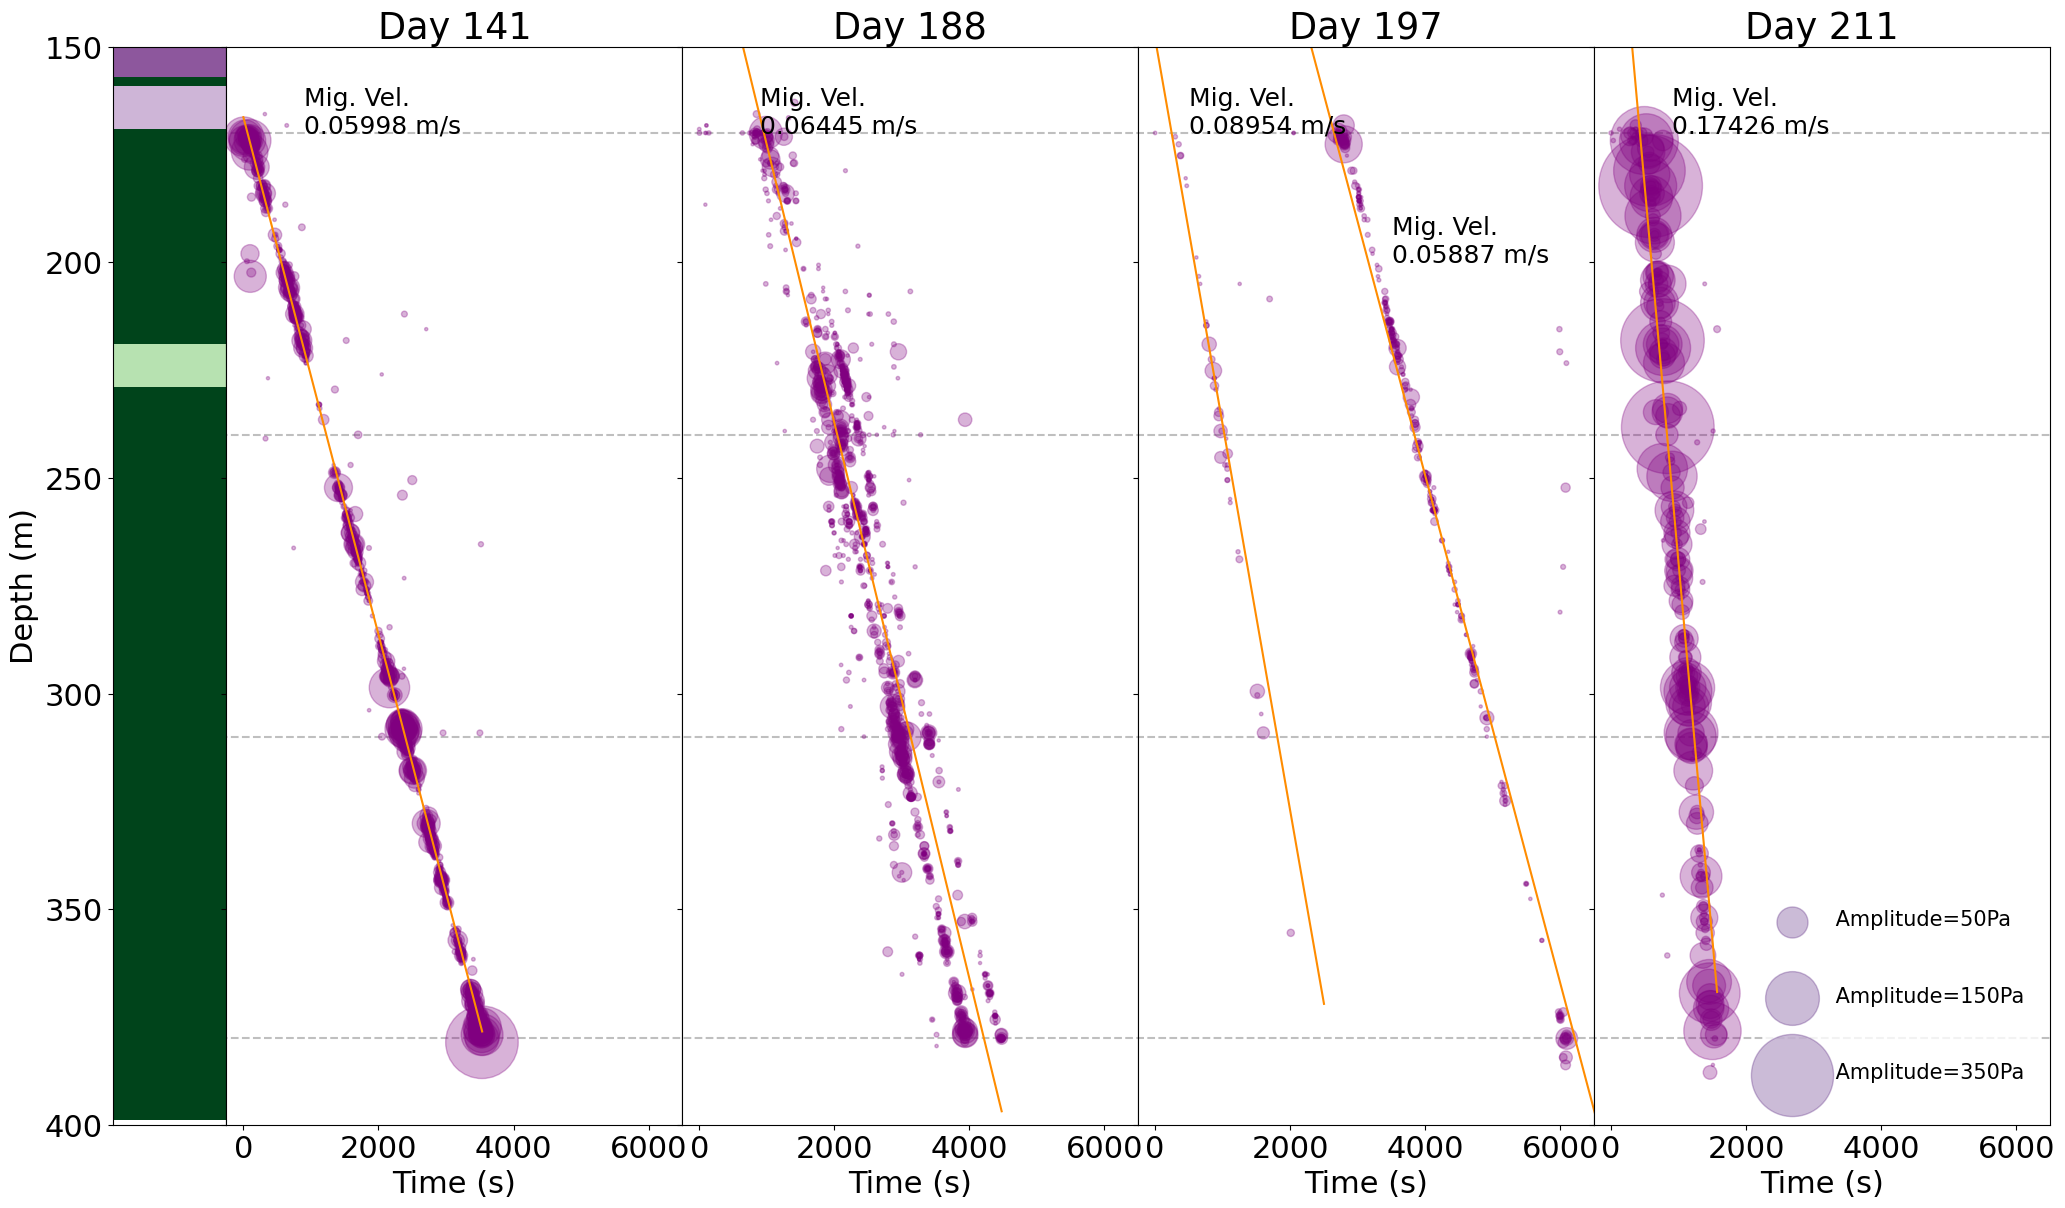

In [189]:
fig = plt.figure(figsize=(25, 14))
mosaic = fig.subplot_mosaic('''
                            abbbbccccddddeeee
                            abbbbccccddddeeee
                            abbbbccccddddeeee
                            abbbbccccddddeeee
                            '''
                           ,sharey=True)
fig.subplots_adjust(wspace=0)

mosaic['a'].set_ylim(400, 150)
mosaic['a'].set_xticks([])
mosaic['a'].set_ylabel('Depth (m)')

for ax in 'bcde':
    mosaic[ax].set_xlim(-250, 6500)
    mosaic[ax].set_xlabel('Time (s)')

mosaic['e'].scatter(() , (), s=[50*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=50Pa \n')
mosaic['e'].scatter(() , (), s=[150*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=150Pa \n')
mosaic['e'].scatter(() , (), s=[350*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=350Pa \n')
# mosaic['e'].scatter(() , (), s=[550*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=550Pa \n')
mosaic['e'].legend(edgecolor='None', loc='lower right', fontsize=15)

plot_hydrophone_depth_horizontal_line(hid='h3', ax=mosaic['b'])
plot_hydrophone_depth_horizontal_line(hid='h4', ax=mosaic['c'])
plot_hydrophone_depth_horizontal_line(hid='h5', ax=mosaic['d'])
plot_hydrophone_depth_horizontal_line(hid='h6', ax=mosaic['e'])

mosaic['b'].set_title('Day 141')
mosaic['c'].set_title('Day 188')
mosaic['d'].set_title('Day 197')
mosaic['e'].set_title('Day 211')

##############
# PLOT DATA HERE
#############

mosaic['a'].pcolormesh(xx, yy, Z[:-1], vmin=0, vmax=6, cmap='PRGn', shading='auto')

x141 = plot_events(data=df141, ax=mosaic['b'])
x188 = plot_events(data=df188, ax=mosaic['c'])
x197 = plot_events(data=df197, ax=mosaic['d'])
x211 = plot_events(data=df211, ax=mosaic['e'])

def fitline(data, ax):
    x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
    y = data['depth'].values.reshape(-1, 1)
    lr = linear_model.LinearRegression()
    lr.fit(x, y)
    modx = np.linspace(0, x.max(), 1000)
    mody = lr.intercept_[0] + lr.coef_[0] * modx
    
    ax.plot(modx, mody, color='darkorange')
    ax.text(s=f'Mig. Vel.\n{np.round(lr.coef_[0][0], 5)} m/s'
            , x=900, y=170
           ,fontsize=18)

fitline(df141, ax=mosaic['b'])
fitline(df188, ax=mosaic['c'])
fitline(df211, ax=mosaic['e'])

# 197 fitline 1
data = df197[:44].copy()
x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values.reshape(-1, 1)
lr = linear_model.LinearRegression()
lr.fit(x, y)
xmod = np.linspace(0, 2500, 1000)
ymod = lr.intercept_ + lr.coef_[0] * xmod
mosaic['d'].plot(xmod, ymod, color='darkorange')
mosaic['d'].text(s=f'Mig. Vel.\n{np.round(lr.coef_[0][0], 5)} m/s'
                 ,x=500, y=170
                 ,fontsize=18)
xstop = x.max()

# 197 fitline 2
data = df197[44:].copy()
x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values.reshape(-1, 1)
lr = linear_model.LinearRegression()
lr.fit(x, y)
xmod = np.linspace(xstop, 7000, 1000)
ymod = lr.intercept_ + lr.coef_[0] * (xmod - xstop)
mosaic['d'].plot(xmod, ymod, color='darkorange')
mosaic['d'].text(s=f'Mig. Vel.\n{np.round(lr.coef_[0][0], 5)} m/s'
                 ,x=3500, y=200
                 ,fontsize=18)

fig.savefig('fig4.pdf', bbox_inches='tight')

velocity:0.0599757570704269
velocity:0.06444835980525337
velocity:0.08953853493643127
velocity:0.058873873773322226
velocity:0.1742586904580593


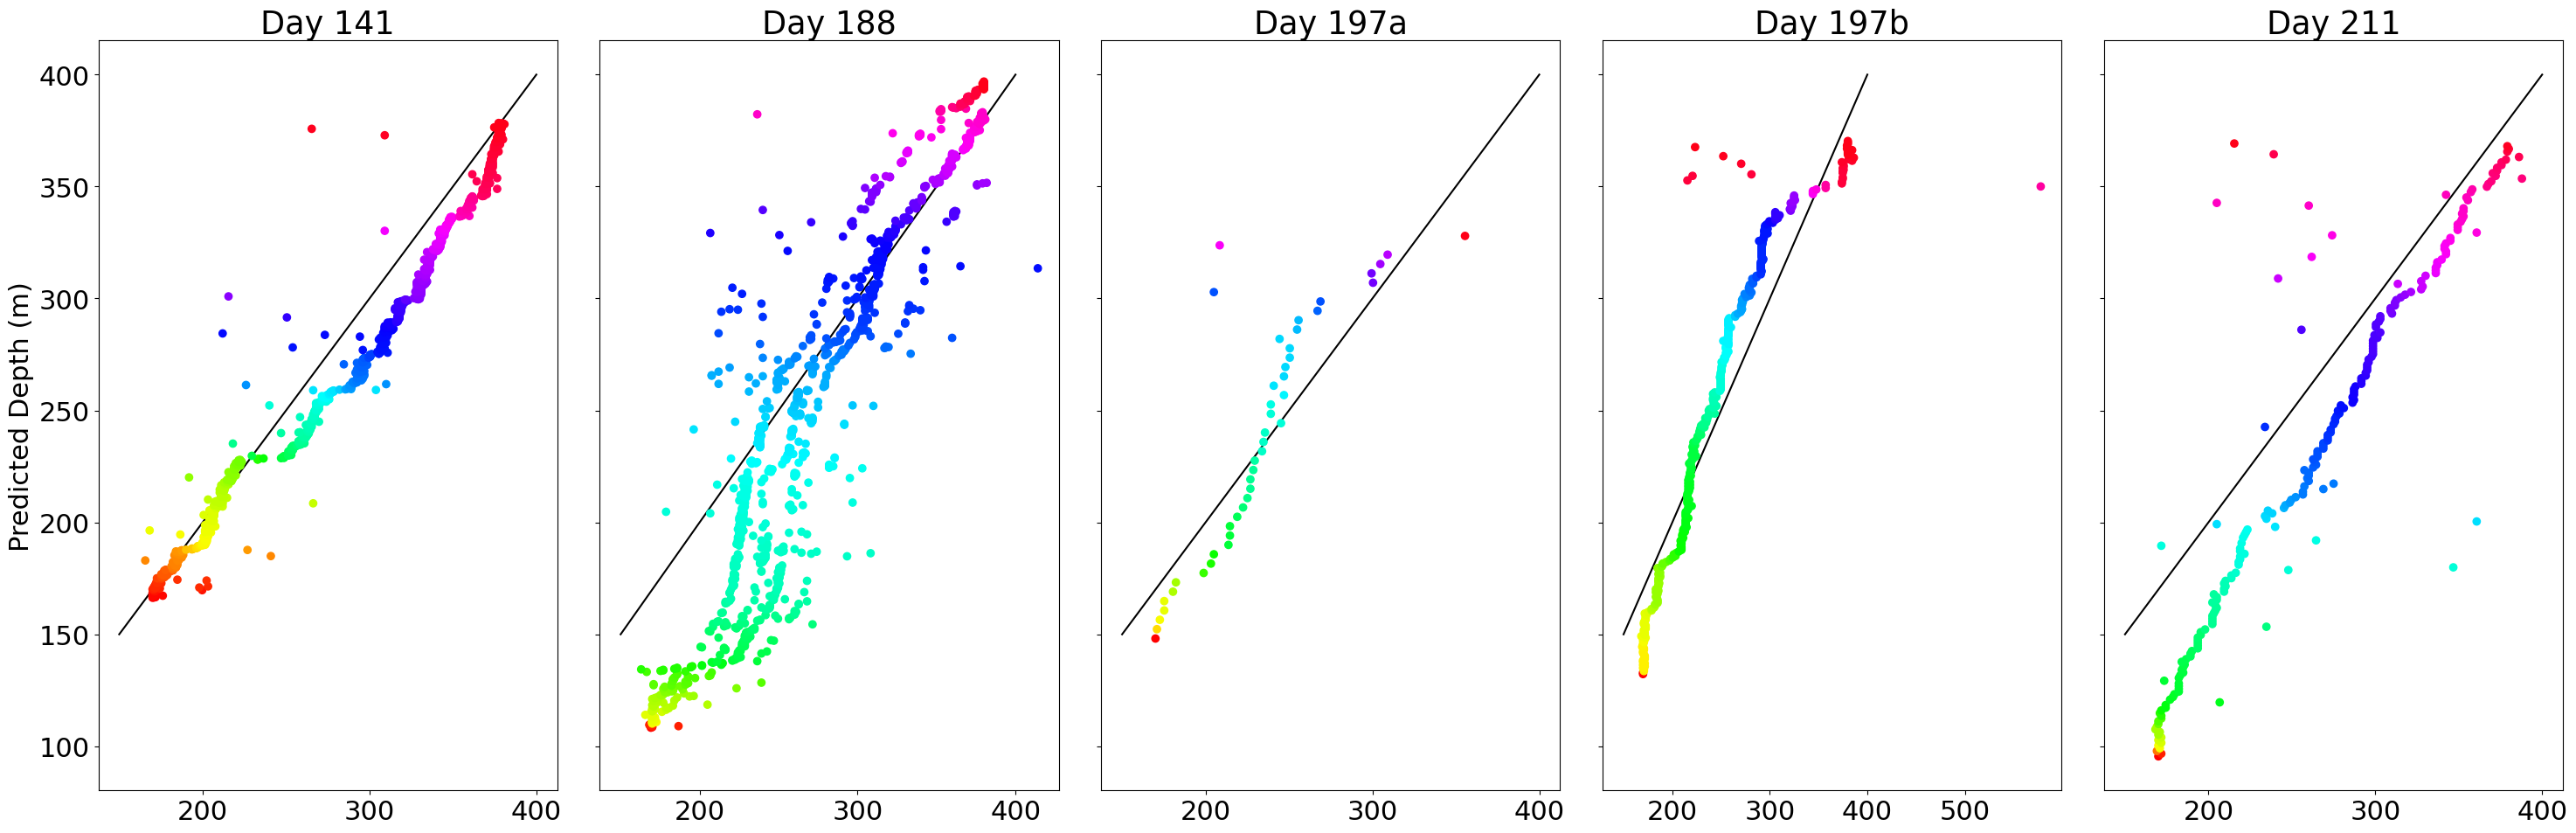

In [266]:
fig = plt.figure(figsize=(30, 10))
mosaic = fig.subplot_mosaic('''
                            abcde
                            '''
                           ,sharey=True)

def plot_residuals(data, ax, **kwargs):
    data = data.copy()
    x = data['arrival_datetime'].diff()
    x = x.apply(lambda t: t.total_seconds())
    x = x.fillna(0).cumsum().values.reshape(-1, 1)
    y = data['depth'].values
    lr = linear_model.LinearRegression()
    lr.fit(x, y)
    
    xmod = np.linspace(0, x.flatten().max(), x.flatten().shape[0])
    ymod = lr.intercept_ + lr.coef_[0] * xmod
    print(f'velocity:{lr.coef_[0]}')

    cbar = ax.scatter(y, ymod, c=x, cmap='hsv')
    ax.plot((150, 400), (150, 400), color='black', zorder=0)
    # ax.set_ylim(150, 400)
    # ax.set_xlim(150, 400)
    # ax.set_xlabel('True Depths (m)')
    # ax.set_ylabel('Predicted Depths (m)')

plot_residuals(data=df141, ax=mosaic['a'])
plot_residuals(data=df188, ax=mosaic['b'])
plot_residuals(data=df197[:44], ax=mosaic['c'])
plot_residuals(data=df197[44:], ax=mosaic['d'])
plot_residuals(data=df211, ax=mosaic['e'])

mosaic['a'].set_ylabel('Predicted Depth (m)')
mosaic['a'].set_title('Day 141')
mosaic['b'].set_title('Day 188')
mosaic['c'].set_title('Day 197a')
mosaic['d'].set_title('Day 197b')
mosaic['e'].set_title('Day 211')
plt.tight_layout()

Text(0, 0.5, 'Predicted Depths (m)')

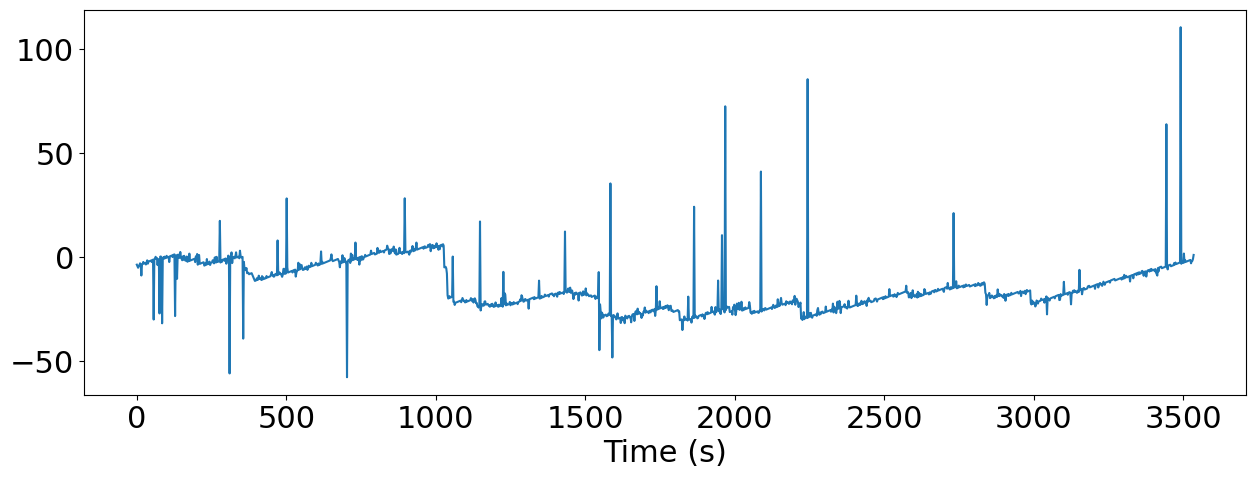

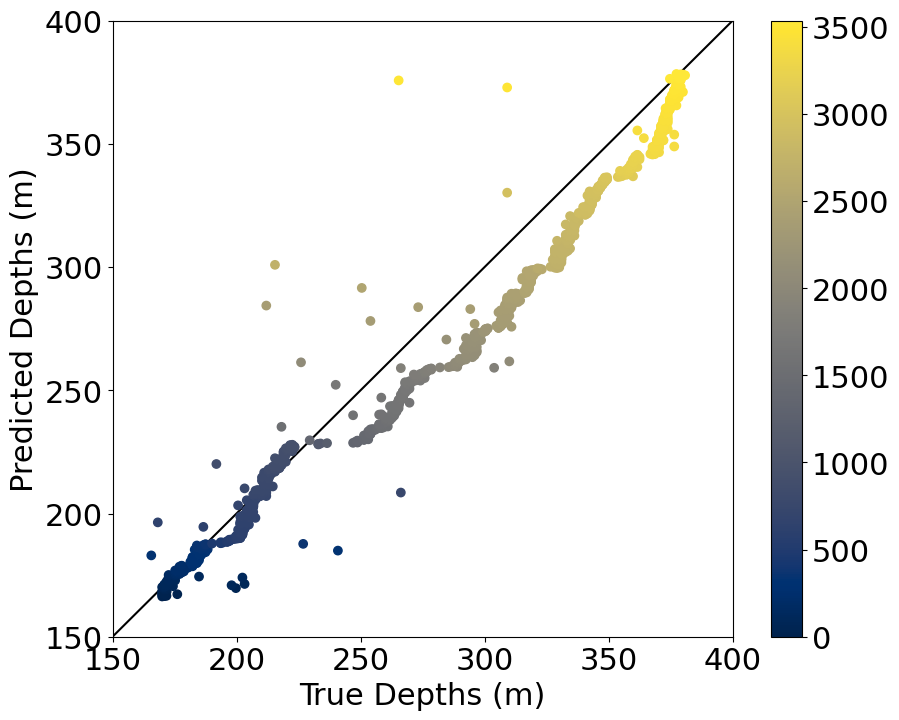

In [233]:
data = df141.copy()
x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values
lr = linear_model.LinearRegression()
lr.fit(x, y)

# xmod = np.linspace(0, x.flatten().max(), x.flatten().shape[0])
# ymod = lr.intercept_ + lr.coef_[0] * xmod

# fig, ax = plt.subplots(figsize=(15, 5))
# ax.plot(xmod, ymod-y)

# ax.set_xlabel('Time (s)')

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
cbar = ax.scatter(y, ymod, c=x, cmap='cividis')
fig.colorbar(cbar)
ax.plot((150, 400), (150, 400), color='black', zorder=0)
ax.set_ylim(150, 400)
ax.set_xlim(150, 400)
ax.set_xlabel('True Depths (m)')
ax.set_ylabel('Predicted Depths (m)')

In [51]:
import sklearn.linear_model as linear_model

In [52]:
linear_model.LinearRegression()

LinearRegression()

In [50]:
df141

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,first_arrival,second_arrival,dt,max_amp,cum_amp,arrival_datetime,origin_time
20,20,170.000,0.000,2,3,18037.318680,2019-05-21 07:38:53.972000+00:00,2019-05-21 07:38:54.012000+00:00,-0.040,7.896286,36.830819,2019-05-21 07:38:53.972000+00:00,2019-05-21T07:38:53.972000Z
26,26,170.875,0.875,2,3,18037.318722,2019-05-21 07:38:57.607000+00:00,2019-05-21 07:38:57.646000+00:00,-0.039,7.151964,21.247216,2019-05-21 07:38:57.607000+00:00,2019-05-21T07:38:57.606500Z
32,32,171.750,1.750,2,3,18037.318751,2019-05-21 07:39:00.080000+00:00,2019-05-21 07:39:00.118000+00:00,-0.038,43.556691,123.454888,2019-05-21 07:39:00.080000+00:00,2019-05-21T07:39:00.079000Z
34,34,170.875,0.875,2,3,18037.318761,2019-05-21 07:39:00.926000+00:00,2019-05-21 07:39:00.965000+00:00,-0.039,81.321380,287.903553,2019-05-21 07:39:00.926000+00:00,2019-05-21T07:39:00.925500Z
40,40,170.875,0.875,2,3,18037.318832,2019-05-21 07:39:07.065000+00:00,2019-05-21 07:39:07.104000+00:00,-0.039,2.485894,23.545395,2019-05-21 07:39:07.065001+00:00,2019-05-21T07:39:07.064500Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,2236,380.875,70.875,5,4,18037.359564,2019-05-21 08:37:46.287000+00:00,2019-05-21 08:37:46.328000+00:00,-0.041,273.186565,869.245134,2019-05-21 08:37:46.287000+00:00,2019-05-21T08:37:46.246500Z
2237,2237,380.000,70.000,5,4,18037.359570,2019-05-21 08:37:46.887000+00:00,2019-05-21 08:37:46.927000+00:00,-0.040,58.447635,345.317400,2019-05-21 08:37:46.887000+00:00,2019-05-21T08:37:46.847000Z
2238,2238,380.000,70.000,5,4,18037.359578,2019-05-21 08:37:47.558000+00:00,2019-05-21 08:37:47.598000+00:00,-0.040,3.880665,18.371736,2019-05-21 08:37:47.558000+00:00,2019-05-21T08:37:47.518000Z
2239,2239,379.125,69.125,5,4,18037.359589,2019-05-21 08:37:48.512000+00:00,2019-05-21 08:37:48.551000+00:00,-0.039,90.585936,266.853667,2019-05-21 08:37:48.512000+00:00,2019-05-21T08:37:48.472500Z
